E WASTE CLASSIFICATION using EfficientNetV2B0_Transfer Learning


DATASET Downloaded and Unzipped

In [1]:
import zipfile
zip_ref= zipfile.ZipFile('/content/E-Waste classification dataset (1).zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Import REQUIRED  LIBRARIES


In [2]:
import tensorflow as tf  # Core TensorFlow library

from tensorflow.keras import layers, models, optimizers, callbacks  # Layers, model creation, optimizers, and training callbacks

from tensorflow.keras.models import Sequential, load_model  # For sequential model architecture and loading saved models

from tensorflow.keras.applications import EfficientNetV2B0  # Pretrained EfficientNetV2B0 model for transfer learning

from tensorflow.keras.applications.efficientnet import preprocess_input  # Preprocessing function specific to EfficientNet

import numpy as np  # Numerical operations and array handling

import matplotlib.pyplot as plt  # Plotting graphs and images

import seaborn as sns  # Plotting graphs and images

from sklearn.metrics import confusion_matrix

from PIL import Image

DIRECTORY_SETUP

In [3]:
trainpath='/content/modified-dataset/train'
testpath='/content/modified-dataset/train'
validatepath='/content/modified-dataset/val'

BATCH FORMATION AND SPECIFING PATH

In [4]:
datatrain= tf.keras.utils.image_dataset_from_directory(trainpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 2400 files belonging to 10 classes.


In [5]:
datatest=tf.keras.utils.image_dataset_from_directory(testpath,shuffle = False, image_size = (128,128), batch_size = 32, validation_split= False)

Found 2400 files belonging to 10 classes.


In [6]:
datavalidate=tf.keras.utils.image_dataset_from_directory(validatepath,shuffle = False, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [7]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


VISUALIZING SAMPLE IMAGES

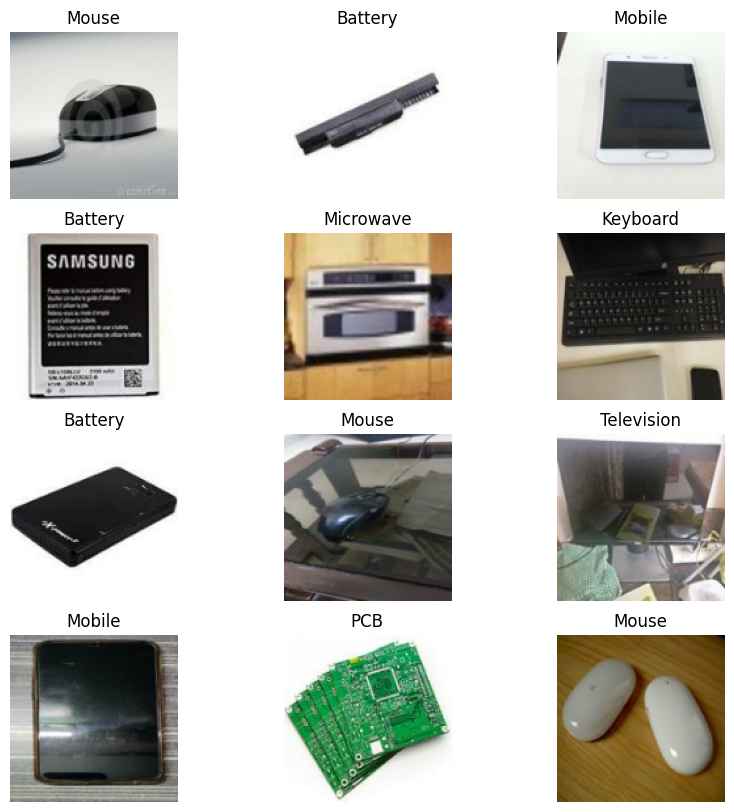

In [8]:
# Set the size of the entire figure (width=10, height=10 inches)
plt.figure(figsize=(10, 10))

# Take one batch from the dataset and iterate over the images and labels
for images, labels in datatrain.take(1):
    # Display the first 12 images from the batch
    for i in range(12):
        # Create a 4x3 grid of subplots and select the (i+1)th position
        ax = plt.subplot(4, 3, i + 1)

        # Display the image; convert the tensor to a NumPy array and ensure correct type
        plt.imshow(images[i].numpy().astype("uint8"))

        # Set the title of the subplot to the class name of the image
        plt.title(class_names[labels[i]])

        # Remove axis ticks and labels for clarity
        plt.axis("off")

IMAGESET AUGMENTATION


In [9]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

EfficientNetV2B0 as MOdel

In [10]:
model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
model.trainable = True
for layer in model.layers[:100]:
    layer.trainable = False

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Configuiring the Model and Compilation

In [11]:
modelE = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    data_augmentation,
    model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:

modelE.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['Accuracy'])

Early_Stopping


In [13]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Monitor to validation_loss
    patience=3,
    restore_best_weights=True     # After stopping, restore the model weights from the epoch with the best val_loss
)

Training with 8 epoch, 100 as batchsize

In [14]:
history = modelE.fit(
    datatrain,                      # Training data generator or dataset
    validation_data=datavalidate,      # Validation data generator or dataset
    epochs=8 ,
    batch_size=100,
    callbacks=[early]               # List of callbacks to apply earlystopping
)

Epoch 1/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - Accuracy: 0.2668 - loss: 2.1005 - val_Accuracy: 0.7600 - val_loss: 1.1503
Epoch 2/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - Accuracy: 0.7884 - loss: 0.9582 - val_Accuracy: 0.9033 - val_loss: 0.5326
Epoch 3/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - Accuracy: 0.8610 - loss: 0.5323 - val_Accuracy: 0.9367 - val_loss: 0.3282
Epoch 4/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - Accuracy: 0.9055 - loss: 0.3571 - val_Accuracy: 0.9533 - val_loss: 0.2145
Epoch 5/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - Accuracy: 0.9265 - loss: 0.2433 - val_Accuracy: 0.9600 - val_loss: 0.1750
Epoch 6/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - Accuracy: 0.9440 - loss: 0.1910 - val_Accuracy: 0.9667 - val_loss: 0.1531
Epoch 7/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - Accuracy: 0.9533 - loss: 0.1712 - val_Accuracy: 0.9633 - val_loss: 0.1441
Epoch 8/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - Accuracy: 0.9665 - loss: 0.1196 - val_Accuracy: 0.9633 - val_loss:

In [18]:
modelE.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 4, 4, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,269,040 (62.06 MB)

 Trainable params: 5,168,458 (19.72 MB)

 Non-trainable params: 763,664 (2.91 MB)

 Optimizer params: 10,336,918 (39.43 MB)

Result_Prediction and Plotting ConfusionMatrix_heatmap

75/75 ━━━━━━━━━━━━━━━━━━━━ 49s 607ms/step


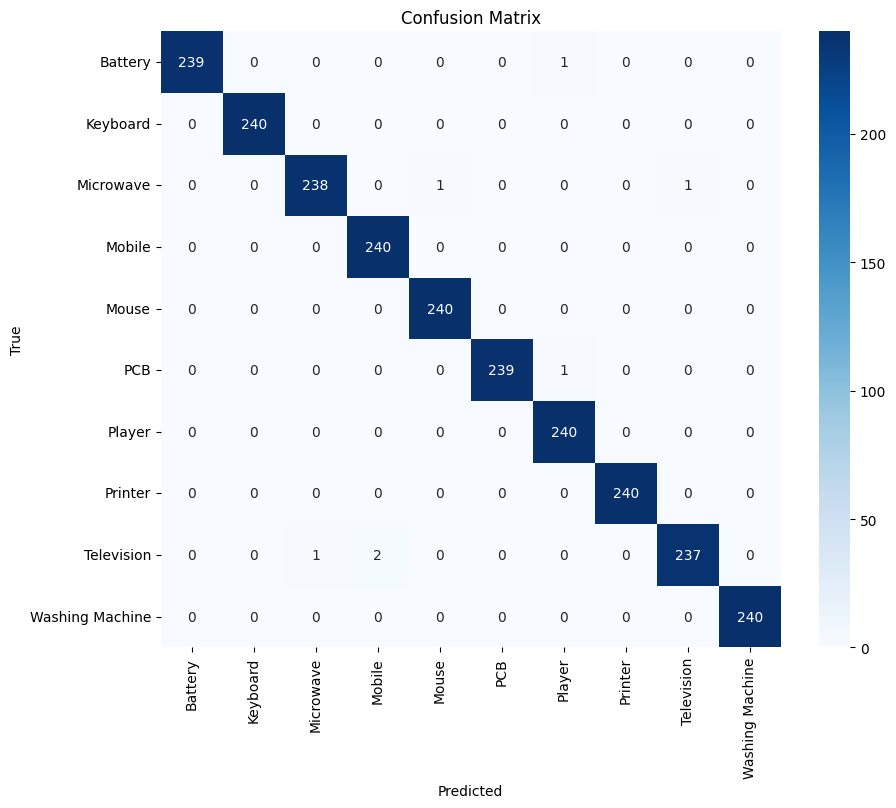

In [17]:

result = modelE.predict(datatest)

# Class with highest probability
y_true = np.concatenate([y.numpy() for x, y in datatest], axis=0)  # Ground truth labels
y_pred = np.argmax(result, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))                         # figure size
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')                            # Create heatmap with class labels

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()